# *Lab Sheet-03*
# **Task 1: Breast Cancer Wisconsin Diagnosis using KNN and Cross-Validation**

# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer

# Load the Dataset

In [2]:
# Load the Breast Cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add target variable
df['target'] = data.target

# Display first 5 rows
print("First 5 rows of dataset:")
print(df.head())

# Print name & roll number
print("\nName: Somesh Singh")
print("Roll Number: 233025921")

First 5 rows of dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  wor

# Data Preprocessing & Splitting

In [3]:
# Checking for missing values
print("Missing values in dataset:")
print(df.isnull().sum())

# Splitting dataset into features (X) and target (y)
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target variable

# Splitting into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print name & roll number
print("\nName: Somesh Singh")
print("Roll Number: 233025921")

Missing values in dataset:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

Name: Somesh Singh
Roll Number: 233025921


# Train KNN Model with Cross-Validation

In [4]:
# Finding the best K value using Cross-Validation
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Choosing the best K
best_k = k_values[np.argmax(cv_scores)]
print(f"Best K value: {best_k}")

# Training the final KNN model with the best K value
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)

# Print name & roll number
print("\nName: Somesh Singh")
print("Roll Number: 233025921")

Best K value: 7

Name: Somesh Singh
Roll Number: 233025921


# Model Prediction & Evaluation

In [5]:
# Predictions
y_pred = model.predict(X_test)

# Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)

# Print name & roll number
print("\nName: Somesh Singh")
print("Roll Number: 233025921")


Model Accuracy: 0.9473684210526315

Name: Somesh Singh
Roll Number: 233025921


# Confusion Matrix & Classification Report

In [6]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

# Print name & roll number
print("\nName: Somesh Singh")
print("Roll Number: 233025921")


Confusion Matrix:
[[40  3]
 [ 3 68]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Name: Somesh Singh
Roll Number: 233025921


# Confusion Matrix Heatmap

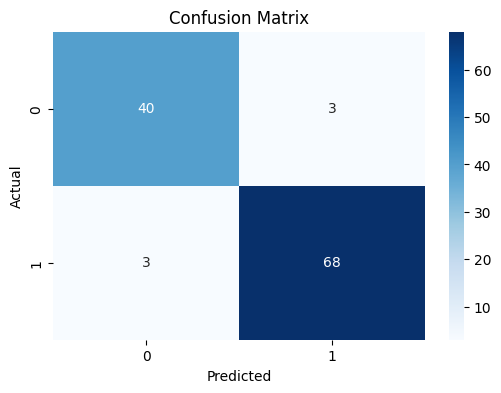


Name: Somesh Singh
Roll Number: 233025921


In [7]:
# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print name & roll number
print("\nName: Somesh Singh")
print("Roll Number: 233025921")